In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import pandas as pd
import os
import re

In [29]:
# path = "PRyMrates/thermo/stasis_abundances.txt"
path = "/Users/alechewitt/Desktop/Stasis/Stasis_prym/PRyMrates/thermo/abundances.txt"
with open(path, "r") as f:
    for line in f:
        if not line.startswith("#"):
            # Split header by commas (even with spaces)
            header = re.split(r',\s*', line.strip())
            break

# Read the data (space/tab-separated)
df = pd.read_csv(
    path,
    comment="#",
    sep=r'\s+',  
    skiprows=1    
)

# Assign cleaned column names
df.columns = header
df.head()

,t_s [s],Tg [MeV],rho_tot,rho_rad,rho_m,rho_dm,rho_m_check,Omega_m,Omega_rad,Omega_m_check
0,0.007517,9.912722,34103.37,34145.31,-41.94546,0.0,307307.8,-0.00123,1.00123,0.9
1,0.007650,9.826192,32928.04,32968.53,-40.49878,0.0,296716.8,-0.00123,1.00123,0.9
2,0.007786,9.740414,31793.20,31832.30,-39.10194,0.0,286490.7,-0.00123,1.00123,0.9
3,0.007923,9.655383,30697.43,30735.19,-37.75323,0.0,276616.7,-0.00123,1.00123,0.9
4,0.008063,9.571092,29639.40,29675.85,-36.45098,0.0,267082.7,-0.00123,1.00123,0.9


In [ ]:
(Omega_m1/Omega_rad1)**(-1)


array([5.19442790e-01, 5.14782918e-01, 5.10151085e-01, ...,
       1.32864413e-07, 1.31281013e-07, 1.29716213e-07])

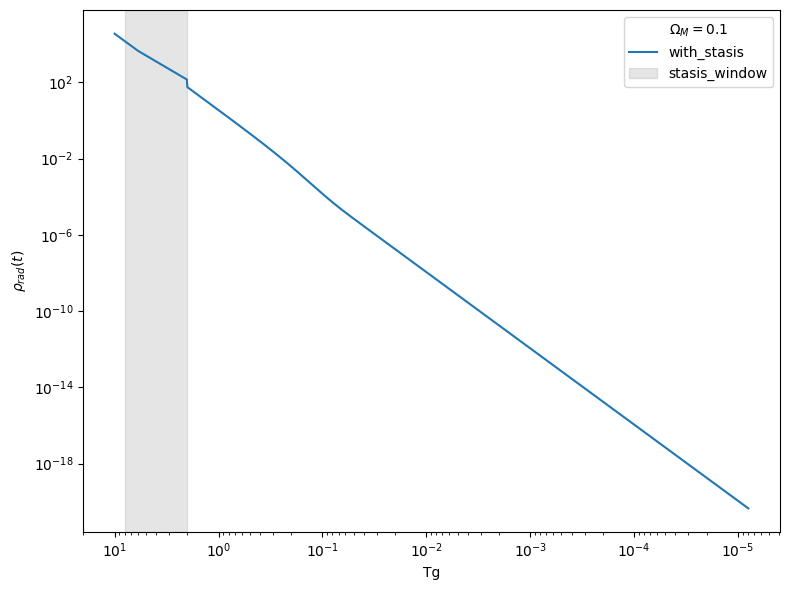

In [30]:
t1, Tg1, rho_tot1, rho_rad1, rho_m1, rho_dm1, rho_m_check1, Omega_m1, Omega_rad1, Omega_m_check1 = \
    np.loadtxt("PRyMrates/thermo/stasis_abundances.txt", unpack=True, skiprows=1)

t2, Tg2, rho_tot2, rho_rad2, rho_m2, _, rho_m_check2, Omega_m2, Omega_rad2, Omega_m_check2 = \
    np.loadtxt("PRyMrates/thermo/abundances.txt", unpack=True, skiprows=1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Tg1, rho_rad1, label="with_stasis")
#ax.plot(Tg2, rho_rad2, label="without_stasis", linestyle="--")

# ax.plot(Tg1, Omega_rad1, label="with_stasis")
# ax.plot(Tg2, Omega_rad2, label="without_stasis", linestyle="--")

ax.axvspan(2, 8, color='gray', alpha=0.2, label='stasis_window')

ax.set_xlabel("Tg")
ax.set_ylabel(r"$\rho_{rad}(t)$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()

ax.legend(title=r"$\Omega_M = 0.1$")

plt.tight_layout()
plt.show()

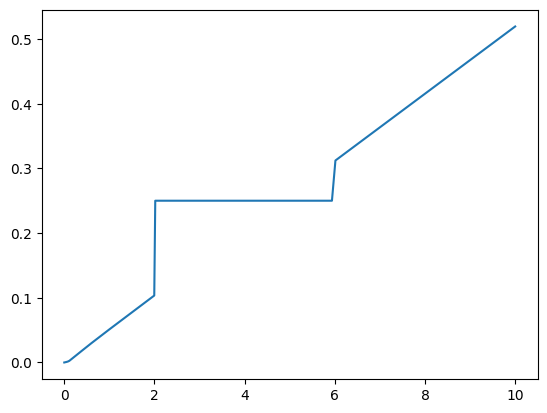

In [31]:
plt.plot(Tg1,(Omega_m1/Omega_rad1)**(-1))